In [2]:
%load_ext autoreload
%autoreload 2

# target image
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)

import logging
logging.basicConfig(level=logging.INFO)

model = BigGAN.from_pretrained('biggan-deep-128')

truncation = 0.5
class_vector = one_hot_from_names(["chimpanzee"], batch_size=1)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1, seed = 10)

noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)


with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

save_as_images(output)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO:pytorch_pretrained_biggan.model:loading model biggan-deep-128 from cache at /Users/xuejiaxin/.pytorch_pretrained_biggan/6371c3777477e4e75187da1b9b526561aac3134f38c7299a3438009ae560e20d.3434ebdfa74a8c17e0e56061cfd905fa163c92f110e88df77b47da6ce9910b48
INFO:pytorch_pretrained_biggan.model:Model config {
  "attention_layer_position": 8,
  "channel_width": 128,
  "class_embed_dim": 128,
  "eps": 0.0001,
  "layers": [
    [
      false,
      16,
      16
    ],
    [
      true,
      16,
      16
    ],
    [
      false,
      16,
      16
    ],
    [
      true,
      16,
      8
    ],
    [
      false,
      8,
      8
    ],
    [
      true,
      8,
      4
    ],
    [
      false,
      4,
      4
    ],
    [
      true,
      4,
      2
    ],
    [
      false,
      2,
      2
    ],
    [
      true,
      2,
      1
    ]
  ],
  "n_stats": 51,
  "num_classes": 1000,
  "output_dim":

In [4]:
class_vector.shape

torch.Size([1, 1000])

In [5]:
from PIL import Image
from torchvision import transforms

img = Image.open("./img02.jpg")
einstein = transforms.ToTensor()(img).unsqueeze_(0)
einstein.shape

torch.Size([1, 3, 128, 128])

In [14]:
class_vector.shape

torch.Size([1, 1000])

In [3]:
from PIL import Image
from torchvision import transforms

img = Image.open("./img02.jpg")
einstein = transforms.ToTensor()(img).unsqueeze_(0)
einstein.shape


torch.Size([1, 3, 128, 128])

In [4]:
from tqdm import trange

In [4]:
class_vector = one_hot_from_names(['macaque'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

In [5]:
DEVICE = 'cpu'

model = model.eval().to(DEVICE)

In [15]:
noise = truncated_noise_sample(truncation=truncation, batch_size=1, seed=10)

# autograd mechanic, requires gradient for input noise
noise = torch.nn.Parameter(torch.tensor(noise, requires_grad=True).float().to(DEVICE)) 
noise

Parameter containing:
tensor([[ 0.3515, -0.8609,  0.1627,  0.3178, -0.0018, -0.3575, -0.4001,  0.3352,
         -0.4498, -0.6211,  0.2296,  0.7483, -0.9673,  0.0146,  0.4180,  0.1363,
          0.2791, -0.2603,  0.6373,  0.2691,  0.0510, -0.5004, -0.1539,  0.2147,
         -0.0698, -0.0793,  0.1428,  0.0157,  0.1840,  0.1221,  0.4055,  0.0259,
          0.6134, -0.2235, -0.6157, -0.2483, -0.5596,  0.4459, -0.7473,  0.1535,
          0.0571,  0.4294, -0.3986,  0.4985, -0.1814,  0.3264, -0.2547,  0.5549,
         -0.2152, -0.4572, -0.1300, -0.6081,  0.4325, -0.4830, -0.1405,  0.7164,
          0.9088, -0.0524,  0.4413, -0.3175,  0.1176,  0.5989,  0.0414,  0.1088,
         -0.7764, -0.1743, -0.6444, -0.2418, -0.2084,  0.3554, -0.7737, -0.0848,
         -0.2292,  0.1663, -0.1882, -0.7615,  0.5461,  0.3392,  0.5422, -0.0993,
          0.1277,  0.0161,  0.1181, -0.3018, -0.2480, -0.8374, -0.2451, -0.3313,
          0.0691,  0.0787, -0.0298, -0.2590, -0.6891,  0.8586, -0.1967, -0.0059,
      

In [16]:
noise_optim = torch.optim.Adam([noise], lr=.01) 

In [17]:
# loss_fun = abs

L = []
for iteration in trange(100):
    noise_optim.zero_grad()

    y_hat = model(noise, class_vector, truncation)

    loss = abs(y_hat - einstein).mean()
    loss.backward()
    noise_optim.step()

    L.append(loss.item())

    save_as_images(y_hat, f"iter_{iteration}_")



 29%|██▉       | 29/100 [01:42<04:11,  3.54s/it]


KeyboardInterrupt: 

In [ ]:
# try to apply other intersting loss fun

In [18]:
from torchvision.models import squeezenet1_0

In [19]:
semantic_model = squeezenet1_0(pretrained=True).to(DEVICE)

In [20]:
#change last two layer in squeezenet
semantic_model.classifier = torch.nn.Sequential(
    torch.nn.Flatten()
)

In [11]:
semantic_model = semantic_model.eval()

In [12]:
noise = truncated_noise_sample(truncation=truncation, batch_size=1, seed=2)
noise = torch.nn.Parameter(torch.tensor(noise, requires_grad=True).float().to(DEVICE))

noise_optim = torch.optim.Adam([noise], lr=0.1)

In [13]:
class_vector = one_hot_from_names(['macaque'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

In [14]:
L = []
L_pixel = []
L_semantic = []
truncation = 0.5

for iteration in trange(0, 100):
    noise_optim.zero_grad()

    y_hat = model(noise, class_vector, truncation)

    semantic_loss = -((semantic_model(y_hat) - semantic_model(output)) ** 2).mean() ** .5 #-cos_sim(semantic_model(y_hat), semantic_model(output))
    L_semantic.append(semantic_loss.item())

    pixel_loss = abs(y_hat - einstein).mean()
    L_pixel.append(pixel_loss)

    loss = semantic_loss + 200 * pixel_loss
    loss.backward()
    noise_optim.step()

    L.append(loss.item())

    save_as_images(y_hat, f"Einstein_iter_{iteration}")



 12%|█▏        | 12/100 [00:46<05:42,  3.89s/it]


KeyboardInterrupt: 

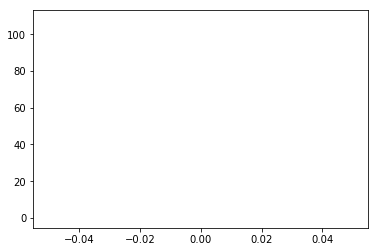

In [14]:
import matplotlib.pyplot as plt

plt.plot(L)
plt.plot(L_pixel, 'r')
plt.plot(L_semantic, 'y')

plt.show()

In [20]:
pixel_loss

tensor(0.3554, grad_fn=<MeanBackward0>)

In [23]:
from PIL import Image
from torchvision import transforms

img = Image.open("./img02.jpg")
einstein = transforms.ToTensor()(img).unsqueeze_(0)
einstein.shape

torch.Size([1, 3, 128, 128])

In [46]:
from torchvision.models import squeezenet1_0

semantic_model = squeezenet1_0(pretrained=True).to(DEVICE)
semantic_model.classifier = torch.nn.Sequential(
    torch.nn.Flatten()
    )
semantic_model = semantic_model.eval()

trunction = 0.5
noise = truncated_noise_sample(truncation=truncation, batch_size=1, seed=2)
noise = torch.nn.Parameter(torch.tensor(noise, requires_grad=True).float().to(DEVICE))
noise_optim = torch.optim.Adam([noise], lr=0.05)

class_vector = one_hot_from_names(['macaque'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

L = []
L_pixel = []
L_semantic = []
truncation = 0.5

for iteration in trange(0, 200):
    noise_optim.zero_grad()

    y_hat = model(noise, class_vector, truncation)

    semantic_loss = ((semantic_model(y_hat) - semantic_model(einstein)) ** 2).mean() ** .5 #-cos_sim(semantic_model(y_hat), semantic_model(output))
    L_semantic.append(semantic_loss.item())

    pixel_loss = abs(y_hat - einstein).mean()
    L_pixel.append(pixel_loss.item())

    loss = semantic_loss + 30 * pixel_loss
    L.append(loss.item())

    loss.backward()
    noise_optim.step()

    

    save_as_images(y_hat, f"Einstein_iter_{iteration}")

100%|██████████| 100/100 [05:29<00:00,  3.29s/it]


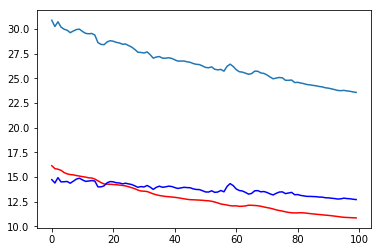

In [47]:
import matplotlib.pyplot as plt

plt.plot(L)
plt.plot([x*30 for x in L_pixel], 'r')
plt.plot(L_semantic, 'b')

plt.show()

In [59]:
from PIL import Image
from torchvision import transforms

img = Image.open("./img03.jpg")
scratch_head = transforms.ToTensor()(img).unsqueeze_(0)

In [62]:
from torchvision.models import squeezenet1_0

semantic_model = squeezenet1_0(pretrained=True).to(DEVICE)
semantic_model.classifier = torch.nn.Sequential(
    torch.nn.Flatten()
    )
semantic_model = semantic_model.eval()

trunction = 0.5
noise = truncated_noise_sample(truncation=truncation, batch_size=1, seed=9)
noise = torch.nn.Parameter(torch.tensor(noise, requires_grad=True).float().to(DEVICE))
noise_optim = torch.optim.Adam([noise], lr=0.05)

class_vector = one_hot_from_names(['macaque'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

L = []
L_pixel = []
L_semantic = []
truncation = 0.5

for iteration in trange(0, 100):
    noise_optim.zero_grad()

    y_hat = model(noise, class_vector, truncation)

    semantic_loss = ((semantic_model(y_hat) - semantic_model(scratch_head)) ** 2).mean() ** .5 #-cos_sim(semantic_model(y_hat), semantic_model(output))
    L_semantic.append(semantic_loss.item())

    pixel_loss = abs(y_hat - scratch_head).mean()
    L_pixel.append(pixel_loss.item())

    loss = semantic_loss + 60 * pixel_loss
    L.append(loss.item())

    loss.backward()
    noise_optim.step()

    if iteration % 5 == 0:
        save_as_images(y_hat, f"scratch_head_{iteration}")

100%|██████████| 100/100 [06:53<00:00,  4.14s/it]


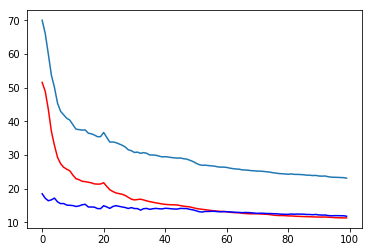

In [64]:
import matplotlib.pyplot as plt

plt.plot(L)
plt.plot([x*60 for x in L_pixel], 'r')
plt.plot(L_semantic, 'b')

plt.show()

In [73]:
from PIL import Image
from torchvision import transforms

img = Image.open("./img05.jpg")
target = transforms.ToTensor()(img).unsqueeze_(0)


from torchvision.models import squeezenet1_0

semantic_model = squeezenet1_0(pretrained=True).to(DEVICE)
semantic_model.classifier = torch.nn.Sequential(
    torch.nn.Flatten()
    )
semantic_model = semantic_model.eval()

trunction = 0.5
noise = truncated_noise_sample(truncation=truncation, batch_size=1, seed=10)
noise = torch.nn.Parameter(torch.tensor(noise, requires_grad=True).float().to(DEVICE))
noise_optim = torch.optim.Adam([noise], lr=0.05)

class_vector = one_hot_from_names(['chimpanzee'], batch_size=1)
class_vector = torch.from_numpy(class_vector)

L = []
L_pixel = []
L_semantic = []

for iteration in trange(0, 100):
    noise_optim.zero_grad()

    y_hat = model(noise, class_vector, truncation)

    semantic_loss = ((semantic_model(y_hat) - semantic_model(target)) ** 2).mean() ** .5 #-cos_sim(semantic_model(y_hat), semantic_model(output))
    L_semantic.append(semantic_loss.item())

    pixel_loss = abs(y_hat - target).mean()
    L_pixel.append(pixel_loss.item())

    loss = semantic_loss + 30 * pixel_loss
    L.append(loss.item())

    loss.backward()
    noise_optim.step()

    if iteration % 5 == 0:
        save_as_images(y_hat, f"chimpanzee_{iteration}")

100%|██████████| 100/100 [04:11<00:00,  2.51s/it]
